### Hackathon 2022 (DDH)
---
- 6개의 Keypoint를 통하여 정상/비정상을 판단하는 문제를 출제한다
- 제공되는 데이터로 6개의 키포인트를 Detection하는 모델을 구축
- 해당 모델에서 찾아진 6개의 키포인트로 비율을 계산해 정상 혹은 비정상을 판단
- 이때의 비율은,
  - 1번 2번 점 이어 연장된 파란색 선
  - 연장된 선과 3번 점의 각도를 A
  - 연장된 선과 4번 점의 각도를 B
  - Head의 최상위, 최하위점 이어서 a가 어딘지 알려 주도록 함
  - 이때 5번 6번 점 이은 직선에서의 a비율을 나눠 정상인지 비정상인지 판단
- Metrics는 oks기반의 mAP를 기준으로 함
- 결과발표를 할 때 어떤 알고리즘을 사용하였으며 어떤 서비스 모델을 만들 수 있을 지 반드시 제시할 것

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from collections import Counter
from pathlib import Path
from sympy import symbols, solve

__file__ = Path(os.path.abspath('__file__'))
root_path = __file__.parent
data_path = root_path / 'data'

sets = ['train', 'validation', 'test', 'all']

print(f'{__file__  = }')

__file__  = PosixPath('/home/shane/workspace/hackathon-ddh/__file__')


In [42]:
dfs = {}
for s in sets:
    dfs[s] = pd.read_csv(data_path / f'{s}.csv')

In [43]:
for s in sets:
    print(f'{s.upper():=^30}')
    display(dfs[s].info())

============TRAIN=============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8284 entries, 0 to 8283
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      8284 non-null   int64  
 1   type           8284 non-null   object 
 2   file_name      8284 non-null   object 
 3   direction      8284 non-null   object 
 4   since          8284 non-null   object 
 5   sex            8284 non-null   object 
 6   age            8284 non-null   int64  
 7   date           8284 non-null   int64  
 8   detailScore    8284 non-null   object 
 9   totalScore     8284 non-null   int64  
 10  segmentation   8264 non-null   object 
 11  keypoints      8281 non-null   object 
 12  num_keypoints  8284 non-null   int64  
 13  containment    6462 non-null   float64
 14  diagnose       6462 non-null   object 
 15  a_angle        8078 non-null   float64
 16  a_diagnose     8272 non-null   object 
 17  b_angle        7365 n

None

==========VALIDATION==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      1000 non-null   int64  
 1   type           1000 non-null   object 
 2   file_name      1000 non-null   object 
 3   direction      1000 non-null   object 
 4   since          1000 non-null   object 
 5   sex            1000 non-null   object 
 6   age            1000 non-null   int64  
 7   date           1000 non-null   int64  
 8   detailScore    1000 non-null   object 
 9   totalScore     1000 non-null   int64  
 10  segmentation   985 non-null    object 
 11  keypoints      1000 non-null   object 
 12  num_keypoints  1000 non-null   int64  
 13  containment    595 non-null    float64
 14  diagnose       595 non-null    object 
 15  a_angle        995 non-null    float64
 16  a_diagnose     998 non-null    object 
 17  b_angle        917 non

None

=============TEST=============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      1000 non-null   int64  
 1   type           1000 non-null   object 
 2   file_name      1000 non-null   object 
 3   direction      1000 non-null   object 
 4   since          1000 non-null   object 
 5   sex            1000 non-null   object 
 6   age            1000 non-null   int64  
 7   date           1000 non-null   int64  
 8   detailScore    1000 non-null   object 
 9   totalScore     1000 non-null   int64  
 10  segmentation   991 non-null    object 
 11  keypoints      1000 non-null   object 
 12  num_keypoints  1000 non-null   int64  
 13  containment    628 non-null    float64
 14  diagnose       628 non-null    object 
 15  a_angle        971 non-null    float64
 16  a_diagnose     1000 non-null   object 
 17  b_angle        932 non

None

=============ALL==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      10284 non-null  int64  
 1   type           10284 non-null  object 
 2   file_name      10284 non-null  object 
 3   direction      10284 non-null  object 
 4   since          10284 non-null  object 
 5   sex            10284 non-null  object 
 6   age            10284 non-null  int64  
 7   date           10284 non-null  int64  
 8   detailScore    10284 non-null  object 
 9   totalScore     10284 non-null  int64  
 10  segmentation   10240 non-null  object 
 11  keypoints      10281 non-null  object 
 12  num_keypoints  10284 non-null  int64  
 13  containment    7685 non-null   float64
 14  diagnose       7685 non-null   object 
 15  a_angle        10044 non-null  float64
 16  a_diagnose     10270 non-null  object 
 17  b_angle        9214

None

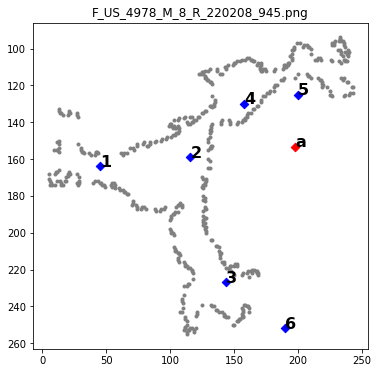

diagnose   normal
a_diagnose normal (72.0 deg.)
b_diagnose normal (31.0 deg.)


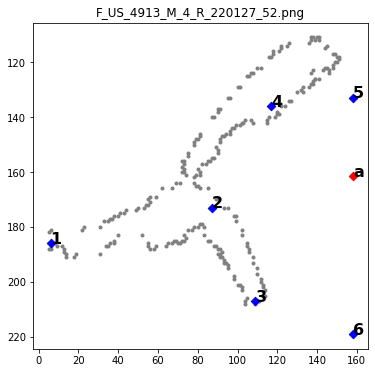

diagnose   nan
a_diagnose normal (66.0 deg.)
b_diagnose normal (42.0 deg.)


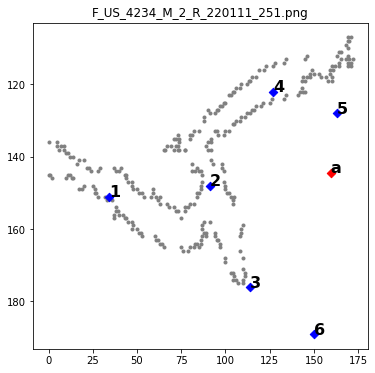

diagnose   nan
a_diagnose mild Dysplasia (54.0 deg.)
b_diagnose normal (33.0 deg.)


In [44]:
# what segmentation-keypoints looks like

for i in range(3):
    file_name = dfs['train']['file_name'][i]
    segmentation = np.reshape(list(map(int, dfs['train']['segmentation'][i].split(' '))), (-1, 2))
    keypoints = np.reshape(list(map(int, dfs['train']['keypoints'][i].split(' '))), (-1, 3))
    keypoints = keypoints[:, :2]
    # print(file_name)
    plt.figure(figsize=(6,6))
    plt.title(file_name)
    plt.gca().invert_yaxis()
    plt.scatter(segmentation[:,0], segmentation[:,1], marker='.', color='grey')
    plt.scatter(keypoints[:,0], keypoints[:,1], marker='D', color='blue')
    for j, (x, y) in enumerate(keypoints, start=1):
        plt.annotate(j, (x, y), weight='bold', size=16)

    x, y = symbols('x, y')
    equation1 = ((keypoints[0][1]-keypoints[1][1])/(keypoints[0][0]-keypoints[1][0]))*(x - keypoints[0][0]) + keypoints[0][1] - y
    if keypoints[4][0] - keypoints[5][0] == 0:
        equation2 = x - keypoints[4][0]
    else:
        equation2 = ((keypoints[4][1]-keypoints[5][1])/(keypoints[4][0]-keypoints[5][0]))*(x - keypoints[4][0]) + keypoints[4][1] - y
    result = solve((equation1, equation2), dict=False)
    plt.scatter(result[x], result[y], marker='D', color='red')
    plt.annotate('a', (result[x], result[y]), weight='bold', size=16)
    plt.show()

    print(f'diagnose   {dfs["train"]["diagnose"][i]}')
    print(f'a_diagnose {dfs["train"]["a_diagnose"][i]} ({dfs["train"]["a_angle"][i]} deg.)')
    print(f'b_diagnose {dfs["train"]["b_diagnose"][i]} ({dfs["train"]["b_angle"][i]} deg.)')
    print('='*30)

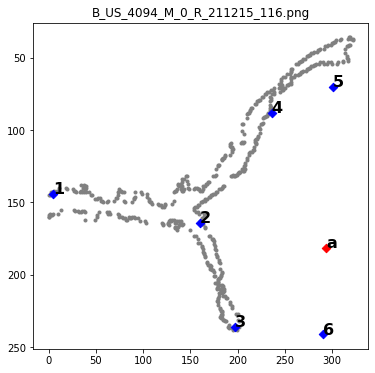

diagnose   abnormal
a_diagnose mild Dysplasia (55.0 deg.)
b_diagnose normal (52.0 deg.)


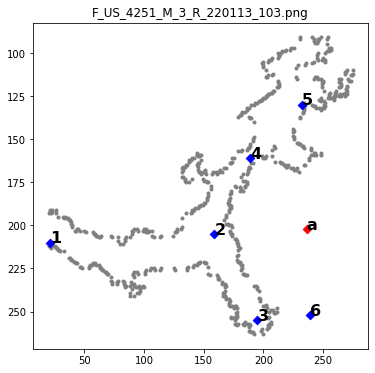

diagnose   abnormal
a_diagnose mild Dysplasia (56.0 deg.)
b_diagnose normal (54.0 deg.)


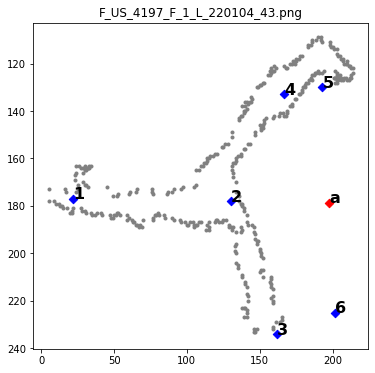

diagnose   abnormal
a_diagnose normal (60.0 deg.)
b_diagnose normal (51.0 deg.)


In [45]:
indexes = dfs['train'][dfs['train']['diagnose'] == 'abnormal'].index[:3]

for i in indexes:
    file_name = dfs['train']['file_name'][i]
    segmentation = np.reshape(list(map(int, dfs['train']['segmentation'][i].split(' '))), (-1, 2))
    keypoints = np.reshape(list(map(int, dfs['train']['keypoints'][i].split(' '))), (-1, 3))
    keypoints = keypoints[:, :2]
    # print(file_name)
    plt.figure(figsize=(6,6))
    plt.title(file_name)
    plt.gca().invert_yaxis()
    plt.scatter(segmentation[:,0], segmentation[:,1], marker='.', color='grey')
    plt.scatter(keypoints[:,0], keypoints[:,1], marker='D', color='blue')
    for j, (x, y) in enumerate(keypoints, start=1):
        plt.annotate(j, (x, y), weight='bold', size=16)

    x, y = symbols('x, y')
    equation1 = ((keypoints[0][1]-keypoints[1][1])/(keypoints[0][0]-keypoints[1][0]))*(x - keypoints[0][0]) + keypoints[0][1] - y
    if keypoints[4][0] - keypoints[5][0] == 0:
        equation2 = x - keypoints[4][0]
    else:
        equation2 = ((keypoints[4][1]-keypoints[5][1])/(keypoints[4][0]-keypoints[5][0]))*(x - keypoints[4][0]) + keypoints[4][1] - y
    result = solve((equation1, equation2), dict=False)
    plt.scatter(result[x], result[y], marker='D', color='red')
    plt.annotate('a', (result[x], result[y]), weight='bold', size=16)
    plt.show()

    print(f'diagnose   {dfs["train"]["diagnose"][i]}')
    print(f'a_diagnose {dfs["train"]["a_diagnose"][i]} ({dfs["train"]["a_angle"][i]} deg.)')
    print(f'b_diagnose {dfs["train"]["b_diagnose"][i]} ({dfs["train"]["b_angle"][i]} deg.)')
    print('='*30)

In [46]:
from collections import Counter

diagnose_types = ['diagnose', 'a_diagnose', 'b_diagnose']
for s in sets:
    print(f'{s.upper():=^30}')
    for dt in diagnose_types:
        print(f'{dt}\t{dict(Counter(dfs[s][dt]))}')
    print()


============TRAIN=============
diagnose	{'normal': 5440, nan: 1822, 'abnormal': 1022}
a_diagnose	{'normal': 6012, 'mild Dysplasia': 1969, 'severe dysplasia': 203, 'moderate dysplasia': 88, nan: 12}
b_diagnose	{'normal': 6820, 'severe dysplasia': 907, 'mild Dysplasia': 534, 'moderate dysplasia': 12, nan: 11}

==========VALIDATION==========
diagnose	{nan: 405, 'normal': 509, 'abnormal': 86}
a_diagnose	{'mild Dysplasia': 328, 'normal': 654, 'moderate dysplasia': 11, 'severe dysplasia': 5, nan: 2}
b_diagnose	{'normal': 860, 'mild Dysplasia': 55, 'severe dysplasia': 83, nan: 2}

=============TEST=============
diagnose	{'normal': 560, nan: 372, 'abnormal': 68}
a_diagnose	{'normal': 792, 'moderate dysplasia': 11, 'mild Dysplasia': 168, 'severe dysplasia': 29}
b_diagnose	{'normal': 888, 'mild Dysplasia': 44, 'severe dysplasia': 68}

=============ALL==============
diagnose	{'normal': 6509, nan: 2599, 'abnormal': 1176}
a_diagnose	{'normal': 7458, 'mild Dysplasia': 2465, 'severe dysplasia': 237, 